In [1]:
import torch
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from PIL import Image
from PIL.ImageDraw import Draw
import random
import numpy as np

In [2]:
from model import *
from utils import *
from train import *
from inference import inference

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

datatset_path = '../datasets/dataset_v4'

batch_size = 512
num_epochs = 40
lr = 3e-4

In [4]:
# Set a random seed for reproducibility
seed = 23
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

In [5]:
dataset = CharDataset(datatset_path, transform=transform, max_crop_error=0.1)

In [6]:
total_size = len(dataset)
train_size = int(0.90 * total_size)
#val_size = int(0.10 * total_size)
#test_size = total_size - train_size - val_size
val_size = total_size - train_size

# Randomly split the dataset
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_dataset.transform = transform_noise

# Create the DataLoader for the training set
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=8, collate_fn=custom_collate, prefetch_factor=2)

# Create the DataLoader for the validation set
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=8, collate_fn=custom_collate, prefetch_factor=2)

In [7]:
model = CaptchaCharClassifier(dropout_rate=0.4, device=device).to(device)

In [8]:
model, train_loss_history, val_loss_history = train(model, train_loader, val_loader, num_epochs, lr, device,
                                                    mixup_alpha=0.7, mixup_prob=0.5, T_0=15, T_mult=2,
                                                    checkpoint_dir='models/checkpoints_v4')

Training: 100%|██████████| 879/879 [25:04<00:00,  1.71s/it] 


Epoch [1/40], Train Loss: 1.7649, LR: 0.000297


Validation: 100%|██████████| 98/98 [02:01<00:00,  1.24s/it]


Epoch [1/40], Val Loss: 0.7668
Checkpoint saved at models/checkpoints_v4/model_epoch_1.pth


Training: 100%|██████████| 879/879 [25:29<00:00,  1.74s/it]


Epoch [2/40], Train Loss: 1.3086, LR: 0.000287


Validation: 100%|██████████| 98/98 [02:24<00:00,  1.47s/it]


Epoch [2/40], Val Loss: 0.6172
Checkpoint saved at models/checkpoints_v4/model_epoch_2.pth


Training: 100%|██████████| 879/879 [33:13<00:00,  2.27s/it]


Epoch [3/40], Train Loss: 1.1908, LR: 0.000271


Validation: 100%|██████████| 98/98 [02:13<00:00,  1.36s/it]


Epoch [3/40], Val Loss: 0.5486
Checkpoint saved at models/checkpoints_v4/model_epoch_3.pth


Training: 100%|██████████| 879/879 [21:12<00:00,  1.45s/it]


Epoch [4/40], Train Loss: 1.1333, LR: 0.000250


Validation: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]


Epoch [4/40], Val Loss: 0.5117
Checkpoint saved at models/checkpoints_v4/model_epoch_4.pth


Training: 100%|██████████| 879/879 [21:37<00:00,  1.48s/it]


Epoch [5/40], Train Loss: 1.0844, LR: 0.000225


Validation: 100%|██████████| 98/98 [02:26<00:00,  1.50s/it]


Epoch [5/40], Val Loss: 0.4706
Checkpoint saved at models/checkpoints_v4/model_epoch_5.pth


Training: 100%|██████████| 879/879 [30:13<00:00,  2.06s/it]


Epoch [6/40], Train Loss: 1.0438, LR: 0.000196


Validation: 100%|██████████| 98/98 [02:52<00:00,  1.76s/it]


Epoch [6/40], Val Loss: 0.4691
Checkpoint saved at models/checkpoints_v4/model_epoch_6.pth


Training: 100%|██████████| 879/879 [23:37<00:00,  1.61s/it]


Epoch [7/40], Train Loss: 1.0235, LR: 0.000166


Validation: 100%|██████████| 98/98 [03:00<00:00,  1.84s/it]


Epoch [7/40], Val Loss: 0.4442
Checkpoint saved at models/checkpoints_v4/model_epoch_7.pth


Training: 100%|██████████| 879/879 [23:27<00:00,  1.60s/it]


Epoch [8/40], Train Loss: 1.0236, LR: 0.000134


Validation: 100%|██████████| 98/98 [03:13<00:00,  1.98s/it]


Epoch [8/40], Val Loss: 0.4327
Checkpoint saved at models/checkpoints_v4/model_epoch_8.pth


Training: 100%|██████████| 879/879 [26:59<00:00,  1.84s/it]


Epoch [9/40], Train Loss: 0.9935, LR: 0.000104


Validation: 100%|██████████| 98/98 [03:52<00:00,  2.37s/it]


Epoch [9/40], Val Loss: 0.4207
Checkpoint saved at models/checkpoints_v4/model_epoch_9.pth


Training: 100%|██████████| 879/879 [30:12<00:00,  2.06s/it]  


Epoch [10/40], Train Loss: 0.9895, LR: 0.000075


Validation: 100%|██████████| 98/98 [02:48<00:00,  1.72s/it]


Epoch [10/40], Val Loss: 0.4374
Checkpoint saved at models/checkpoints_v4/model_epoch_10.pth


Training: 100%|██████████| 879/879 [28:58<00:00,  1.98s/it]  


Epoch [11/40], Train Loss: 0.9969, LR: 0.000050


Validation: 100%|██████████| 98/98 [04:11<00:00,  2.57s/it]


Epoch [11/40], Val Loss: 0.4065
Checkpoint saved at models/checkpoints_v4/model_epoch_11.pth


Training: 100%|██████████| 879/879 [30:28<00:00,  2.08s/it]


Epoch [12/40], Train Loss: 0.9840, LR: 0.000029


Validation: 100%|██████████| 98/98 [03:00<00:00,  1.84s/it]


Epoch [12/40], Val Loss: 0.4239
Checkpoint saved at models/checkpoints_v4/model_epoch_12.pth


Training: 100%|██████████| 879/879 [26:29<00:00,  1.81s/it]


Epoch [13/40], Train Loss: 0.9557, LR: 0.000013


Validation: 100%|██████████| 98/98 [03:20<00:00,  2.05s/it]


Epoch [13/40], Val Loss: 0.3806
Checkpoint saved at models/checkpoints_v4/model_epoch_13.pth


Training: 100%|██████████| 879/879 [29:13<00:00,  1.99s/it] 


Epoch [14/40], Train Loss: 1.0097, LR: 0.000003


Validation: 100%|██████████| 98/98 [02:32<00:00,  1.55s/it]


Epoch [14/40], Val Loss: 0.4077
Checkpoint saved at models/checkpoints_v4/model_epoch_14.pth


Training: 100%|██████████| 879/879 [26:23<00:00,  1.80s/it]


Epoch [15/40], Train Loss: 0.9630, LR: 0.000300


Validation: 100%|██████████| 98/98 [03:24<00:00,  2.09s/it]


Epoch [15/40], Val Loss: 0.4073
Checkpoint saved at models/checkpoints_v4/model_epoch_15.pth


Training: 100%|██████████| 879/879 [27:26<00:00,  1.87s/it] 


Epoch [16/40], Train Loss: 0.9697, LR: 0.000299


Validation: 100%|██████████| 98/98 [02:28<00:00,  1.52s/it]


Epoch [16/40], Val Loss: 0.4000
Checkpoint saved at models/checkpoints_v4/model_epoch_16.pth


Training: 100%|██████████| 879/879 [22:07<00:00,  1.51s/it]


Epoch [17/40], Train Loss: 0.9504, LR: 0.000297


Validation: 100%|██████████| 98/98 [02:59<00:00,  1.83s/it]


Epoch [17/40], Val Loss: 0.3843
Checkpoint saved at models/checkpoints_v4/model_epoch_17.pth


Training: 100%|██████████| 879/879 [24:24<00:00,  1.67s/it]


Epoch [18/40], Train Loss: 0.9626, LR: 0.000293


Validation: 100%|██████████| 98/98 [01:50<00:00,  1.13s/it]


Epoch [18/40], Val Loss: 0.3894
Checkpoint saved at models/checkpoints_v4/model_epoch_18.pth


Training: 100%|██████████| 879/879 [18:38<00:00,  1.27s/it]


Epoch [19/40], Train Loss: 0.9411, LR: 0.000287


Validation: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]


Epoch [19/40], Val Loss: 0.3748
Checkpoint saved at models/checkpoints_v4/model_epoch_19.pth


Training: 100%|██████████| 879/879 [15:07<00:00,  1.03s/it]


Epoch [20/40], Train Loss: 0.9675, LR: 0.000280


Validation: 100%|██████████| 98/98 [01:44<00:00,  1.07s/it]


Epoch [20/40], Val Loss: 0.3973
Checkpoint saved at models/checkpoints_v4/model_epoch_20.pth


Training: 100%|██████████| 879/879 [15:18<00:00,  1.04s/it]


Epoch [21/40], Train Loss: 0.9584, LR: 0.000271


Validation: 100%|██████████| 98/98 [01:43<00:00,  1.06s/it]


Epoch [21/40], Val Loss: 0.3706
Checkpoint saved at models/checkpoints_v4/model_epoch_21.pth


Training: 100%|██████████| 879/879 [22:07<00:00,  1.51s/it]


Epoch [22/40], Train Loss: 0.9378, LR: 0.000261


Validation: 100%|██████████| 98/98 [03:18<00:00,  2.03s/it]


Epoch [22/40], Val Loss: 0.4133
Checkpoint saved at models/checkpoints_v4/model_epoch_22.pth


Training:   6%|▋         | 56/879 [01:33<22:59,  1.68s/it] 


KeyboardInterrupt: 

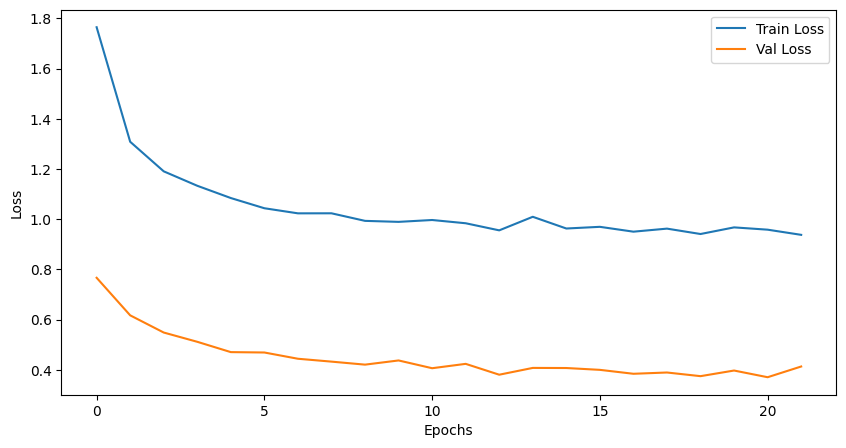

In [8]:
plot_loss(train_loss_history, val_loss_history)

In [7]:
model = CaptchaCharClassifier(dropout_rate=0.4, device=device).to(device)
epoch, train_loss_history, val_loss_history, scheduler = load_checkpoint('models/checkpoints_v4/model_epoch_22.pth', model)

/mnt/d/Documents/GitHub/captcha_solver/charcter_recognition/train.py:57: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


Checkpoint loaded from models/checkpoints_v4/model_epoch_22.pth, Epoch: 22


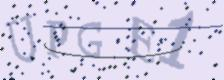

U -> O
P -> W
G -> J
E -> T
1 -> 7


In [17]:
num = '400'
path = '../datasets/dataset_v4/' + num
image = Image.open(path + '.jpg')
bbs = []
c_s = []
with open(path + '.txt', 'r') as f:
    for line in f.readlines():
        data = line.strip().split(' ')
        class_char = data[0] # not used
        x_min, y_min, x_max, y_max = float(data[1]), float(data[2]), float(data[3]), float(data[4])
        c_s.append(class_char)
        bbs.append((x_min, y_min, x_max, y_max))

image.show()
for i in range(len(bbs)):
    c = inference(model, image, bbs[i], device, transform)
    print(f"{c_s[i]} -> {c}")

In [9]:
d = next(iter(train_loader))

In [10]:
d[0][0].shape

torch.Size([3, 66, 66])

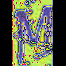

In [18]:
to_pil = T.ToPILImage()
image = to_pil(d[0][99])
image.show()

In [3]:
11//5

2